<img src="./logo_UTN.svg" align="right" width="150" />

#### Procesamiento Digital de Señales
# TS6: Ventanas
#### Eloy Silva

### Configuración e inicio de la simulación

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (13,7)

import warnings
warnings.filterwarnings('ignore')
 
N = 1000    #Cantidad de muestras
fs = N
R = 200     #Cantidad de realizaciones

a1 = 2      #Amplitud de la señal original

fr = np.random.uniform(-2, 2, R)
w0 = N/4
w1 = w0 + fr          #Frecuencia de señal

k = np.arange(0, N/fs, 1/fs)        #Vector de tiempo

x = np.zeros((N, R))
w_blackman = np.zeros((N, R))
w_flattop = np.zeros((N, R))

### Generación de señal analógica y ventanas. Cálculo de Espectros.

(225.0, 275.0)

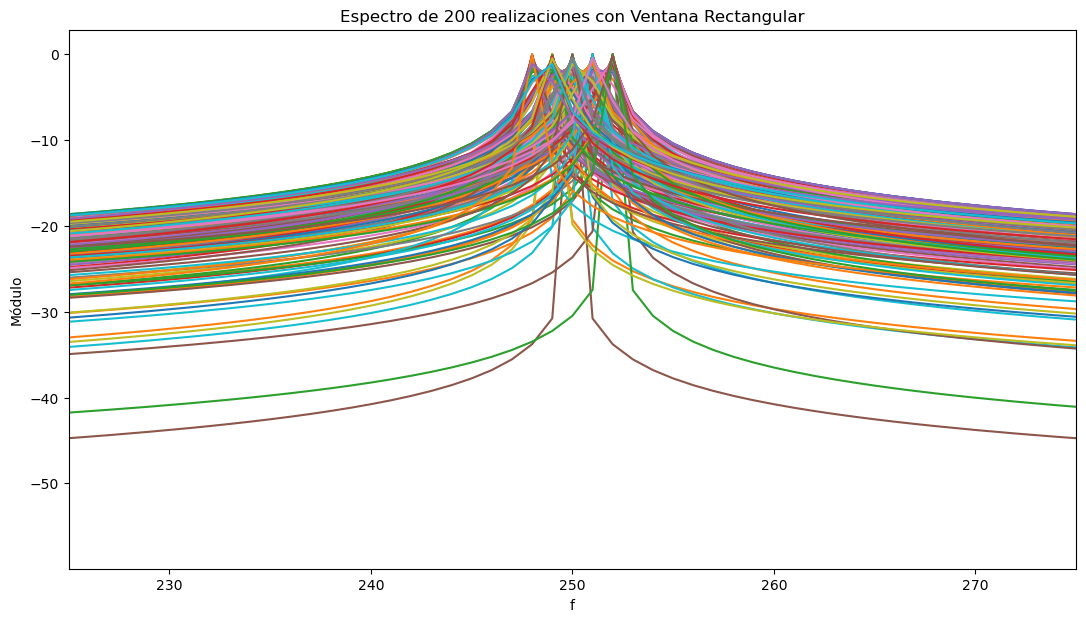

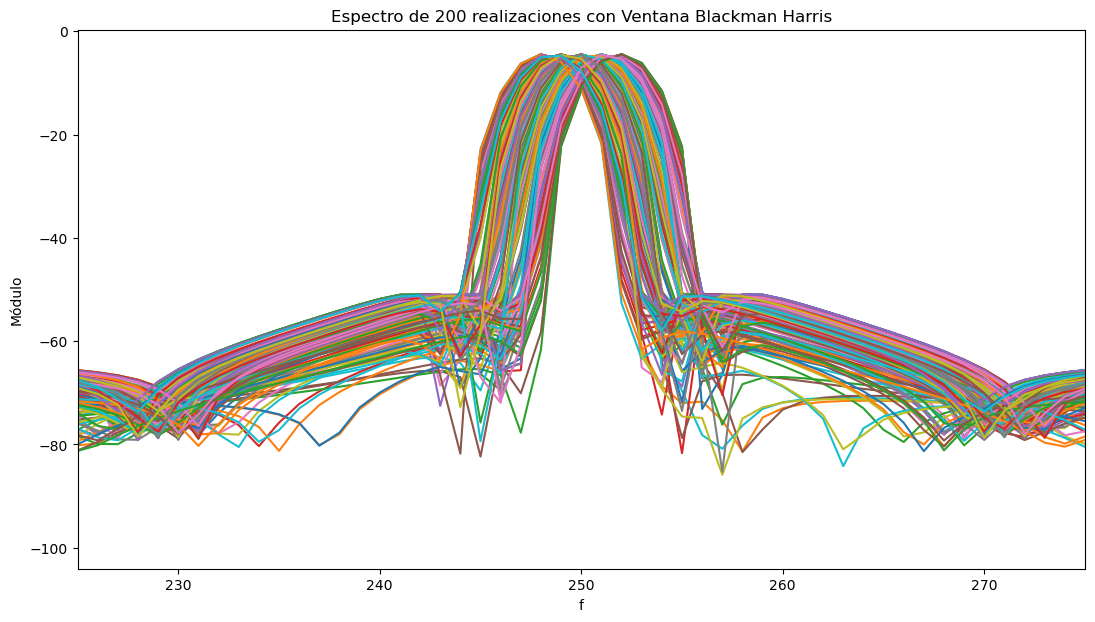

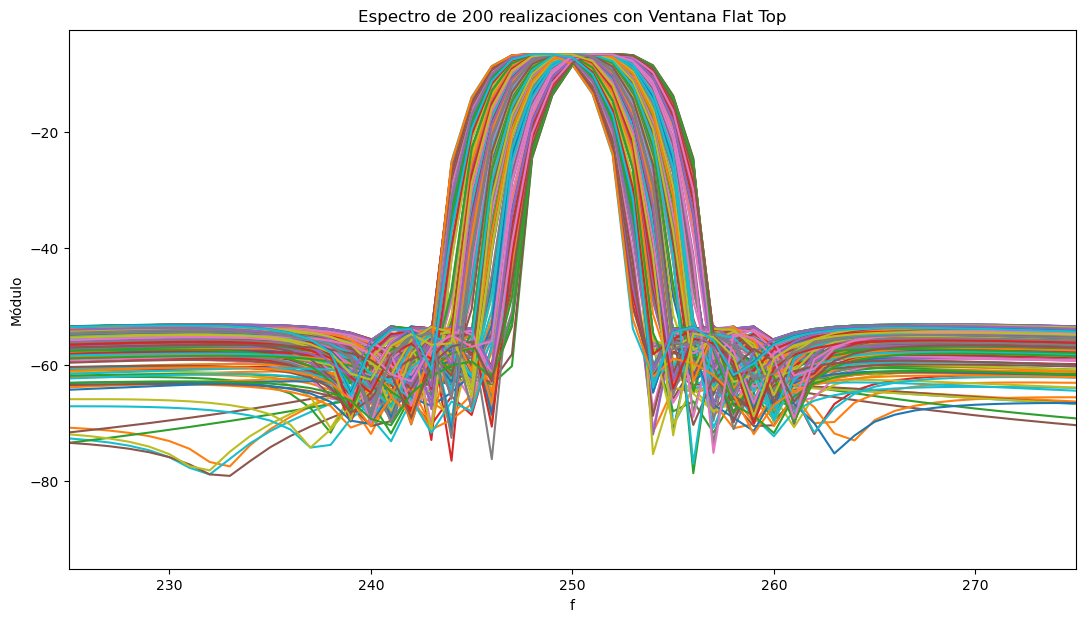

In [10]:
for i in range(R):
    W = w1[i]
    x[:, i] = a1*np.sin(2*np.pi*W*k)                        #Generación de señal senoidal
        
    w_blackman[:, i] = sp.signal.windows.blackmanharris(N)  #Ventana Blackman Harris
    w_flattop[:, i] = sp.signal.windows.flattop(N)          #Ventana Flat Top

f = np.arange(0, fs, 1)                               #Vector de frecuencias
ft_X_rect = np.fft.fft(x, axis=0)/N                   #Espectro ventana rectangular
ft_X_blackman = np.fft.fft(x*w_blackman, axis=0)/N    #Espectro ventana Blackman Harris
ft_X_flattop = np.fft.fft(x*w_flattop, axis=0)/N      #Espectro ventana Flat Top

plt.figure()
plt.plot(f, 10*np.log10(np.abs(ft_X_rect)))
plt.title('Espectro de 200 realizaciones con Ventana Rectangular')
plt.ylabel('Módulo')
plt.xlabel('f')
plt.xlim(225, 275)

plt.figure()
plt.plot(f, 10*np.log10(np.abs(ft_X_blackman)))
plt.title('Espectro de 200 realizaciones con Ventana Blackman Harris')
plt.ylabel('Módulo')
plt.xlabel('f')
plt.xlim(225, 275)

plt.figure()
plt.plot(f, 10*np.log10(np.abs(ft_X_flattop)))
plt.title('Espectro de 200 realizaciones con Ventana Flat Top')
plt.ylabel('Módulo')
plt.xlabel('f')
plt.xlim(225, 275)

### Cálculo de estimador de Módulo para las diferentes Ventanas.

Sesgo ventana rectangular: -1.3331236602489374
Varianza ventana rectangular: 0.403174631610702

Sesgo ventana Blackman Harris: -1.5334791297501815
Varianza ventana Blackman Harris: 0.03345546546576625

Sesgo ventana Flat Top: -1.6057965035285369
Varianza ventana Flat Top: 0.0020436388493826115



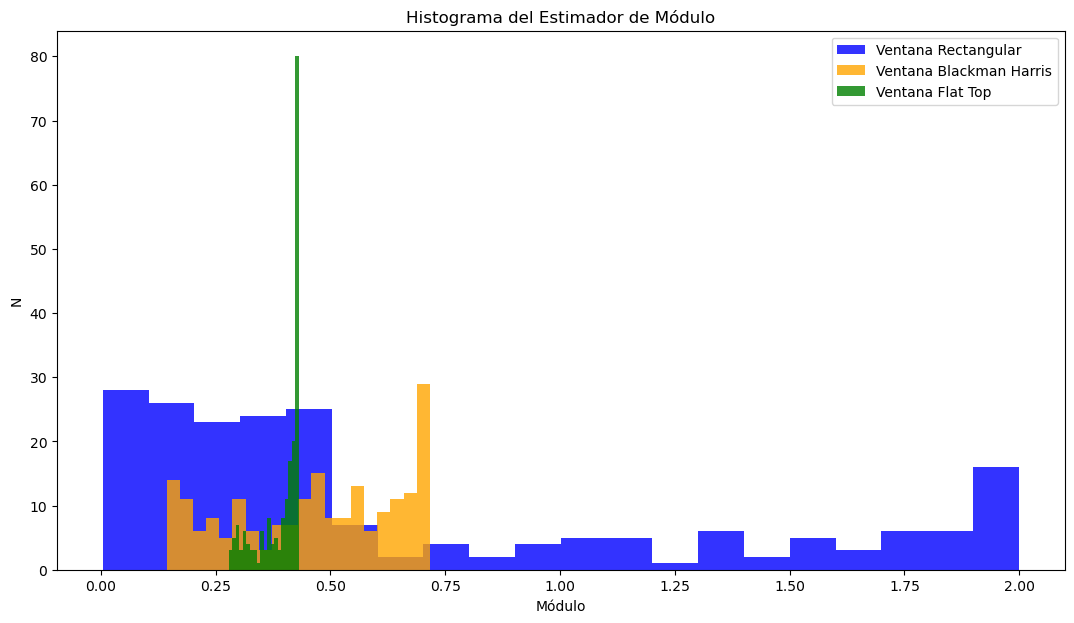

In [3]:
a_rect = 2*np.abs(ft_X_rect[N//4, :])            #Estimador de módulo ventana rectangular
a_blackman = 2*np.abs(ft_X_blackman[N//4, :])    #Estimador de módulo ventana Blackman Harris
a_flattop = 2*np.abs(ft_X_flattop[N//4, :])      #Estimador de módulo ventana Flat Top

print("Sesgo ventana rectangular: " + str(np.mean(a_rect) - a1))
print("Varianza ventana rectangular: " + str(np.var(a_rect)) + "\n")
print("Sesgo ventana Blackman Harris: " + str(np.mean(a_blackman) - a1))
print("Varianza ventana Blackman Harris: " + str(np.var(a_blackman)) + "\n")
print("Sesgo ventana Flat Top: " + str(np.mean(a_flattop) - a1))
print("Varianza ventana Flat Top: " + str(np.var(a_flattop)) + "\n")

plt.figure()
plt.hist(a_rect, bins=20, alpha=0.8, label='Ventana Rectangular', color='blue')
plt.hist(a_blackman, bins=20, alpha=0.8, label='Ventana Blackman Harris', color='orange')
plt.hist(a_flattop, bins=20, alpha=0.8, label='Ventana Flat Top', color='green')
plt.title('Histograma del Estimador de Módulo')
plt.xlabel('Módulo')
plt.ylabel('N')
plt.legend()
plt.show()

### Cálculo de estimador de Frecuencia para las diferentes Ventanas.

Sesgo ventana rectangular: -0.009999999999990905
Varianza ventana rectangular: 1.4999

Sesgo ventana Blackman Harris: -0.009999999999990905
Varianza ventana Blackman Harris: 1.4999

Sesgo ventana Flat Top: -0.009999999999990905
Varianza ventana Flat Top: 1.4999



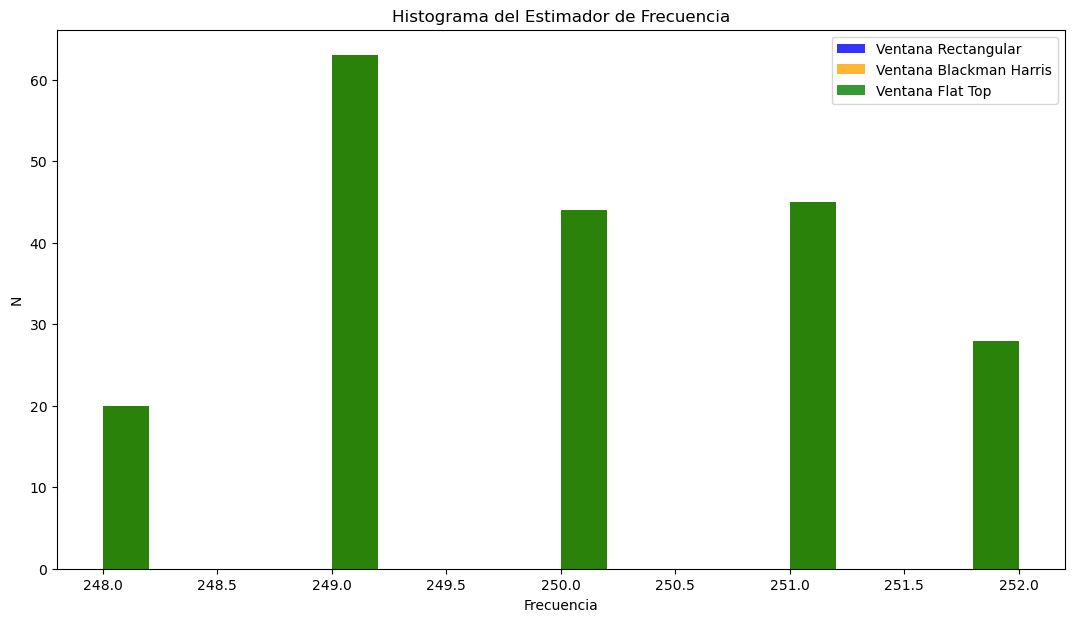

In [5]:
index_rect = np.argmax(np.abs(ft_X_rect[:fs//2, :]), axis=0)          #Estimador de frecuencia ventana rectangular
w_rect = f[index_rect]
index_blackman = np.argmax(np.abs(ft_X_blackman[:fs//2, :]), axis=0)  #Estimador de frecuencia ventana Blackman Harris
w_blackman = f[index_blackman]
index_flattop = np.argmax(np.abs(ft_X_flattop[:fs//2, :]), axis=0)    #Estimador de frecuencia ventana Flat Top
w_flattop = f[index_flattop]

print("Sesgo ventana rectangular: " + str(np.mean(w_rect) - w0))
print("Varianza ventana rectangular: " + str(np.var(w_rect)) + "\n")
print("Sesgo ventana Blackman Harris: " + str(np.mean(w_blackman) - w0))
print("Varianza ventana Blackman Harris: " + str(np.var(w_blackman)) + "\n")
print("Sesgo ventana Flat Top: " + str(np.mean(w_flattop) - w0))
print("Varianza ventana Flat Top: " + str(np.var(w_flattop)) + "\n")

plt.figure()
plt.hist(w_rect, bins=20, alpha=0.8, label='Ventana Rectangular', color='blue')
plt.hist(w_blackman, bins=20, alpha=0.8, label='Ventana Blackman Harris', color='orange')
plt.hist(w_flattop, bins=20, alpha=0.8, label='Ventana Flat Top', color='green')
plt.title('Histograma del Estimador de Frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('N')
plt.legend()
plt.show()

### Se observa que tanto la ventana Blackman Harris como la Flat Top poseen mucha menor varianza que la ventana rectangular pero con un sesgo mayor para el estimador de módulo. Sin embargo, al ser este un error sistemático, se puede corregir para obtener una estimación más precisa del módulo. Por otro lado, no se ven diferencias en el sesgo o varianza para el estimador de frecuencia por lo que las ventanas no ayudaron en la estimación.